<a href="https://colab.research.google.com/github/omarreess/DLI-Internship-Data-Science/blob/main/Assignment%2010%20-%20Classification%20Regressor%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Naive Bayes , Classification for Reg Assignment

<h2> Importing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import mnist
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor 
import lightgbm as ltb
from sklearn.ensemble import StackingRegressor



from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import accuracy_score,classification_report,precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
 
from sklearn.naive_bayes import CategoricalNB, GaussianNB, ComplementNB, BernoulliNB, MultinomialNB 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score , mean_absolute_percentage_error
 

<h2> Importing Dataset

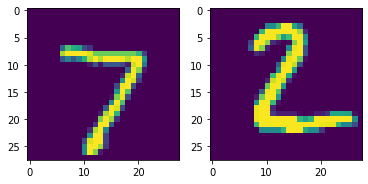

New Data shape : (60000, 784)
Its Max value : 255
Its Min value:0
After normalization:
Its Max value : 1.0
Its Min value:0.0


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# show sample of data
plt.subplot(1, 2, 1) 
plt.imshow(X_test[0]) 
plt.subplot(1, 2, 2) 
plt.imshow(X_test[1]) 
plt.show()

# Rehshape
X_train = X_train.reshape(X_train.shape[0] , -1)
X_test = X_test.reshape(X_test.shape[0] , -1)
print(f"New Data shape : {X_train.shape}")

#Normalizaiton
print(f'Its Max value : {X_train.max()}\nIts Min value:{X_train.min()}') 
X_train = X_train  / 255.0
X_test = X_test / 255.0
print(f'After normalization:\nIts Max value : {X_train.max()}\nIts Min value:{X_train.min()}')



<H2> Naive Bayes Algorithm

In [ ]:
# fitting data
classifier_nb = MultinomialNB() 
classifier_nb.fit(X_train, y_train)

y_pred = classifier_nb.predict(X_test) 

# metric
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.74      0.79       982
           5       0.87      0.66      0.75       892
           6       0.89      0.90      0.89       958
           7       0.93      0.84      0.88      1028
           8       0.66      0.80      0.72       974
           9       0.71      0.85      0.77      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



<H1>Importing & Preprocess Nmeric Data for Regression

In [ ]:
# Import 
dataset = pd.read_csv('/content/50_Startups - 50_Startups.csv')

# Clean
dataset.dropna(inplace=True )

# Labeling categorical data
dataset['State']= LabelEncoder().fit_transform(dataset['State'],)
dataset.tail()

# Splitting  
features_cols = dataset.iloc[:,:-1].values
output_col = dataset.iloc[:,-1].values
 


features_train, features_test, output_train, output_test = train_test_split (features_cols, output_col,   test_size = 0.25,    
                                                                             random_state = 0,)


# Normalize
   
normalizing_scaller =MinMaxScaler()  
normalizing_scaller.fit(features_train)
features_cols_train_normlized = normalizing_scaller.transform(features_train) 
features_cols_test_normlized = normalizing_scaller.transform(features_test) 

dataset.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


<H2> Classficaiton Algorthims for Regression 

In [ ]:
# KNN 
regressor_knn = KNeighborsRegressor(n_neighbors=16) 
regressor_knn.fit(features_train, output_train)
y_pred_knn = regressor_knn.predict(features_test)
MAPE	= mean_absolute_percentage_error(output_test, y_pred_knn)
print(f'KNN Regressor with 16 Nieghbors , MAPE: {round(MAPE*100,2)}%')

# SVR 
regressor_svr = SVR(kernel='rbf') 
regressor_svr.fit(features_train, output_train)
y_pred_svr = regressor_svr.predict(features_test)
MAPE = mean_absolute_percentage_error(output_test, y_pred_svr) 
print(f'SVR Regressor For kernel rbf , MAPE: {round(MAPE*100,2)}%')

# Decision Tree Regressor
regressor_DT = DecisionTreeRegressor() 
regressor_DT.fit(features_train, output_train)
y_pred_DT = regressor_DT.predict(features_test)
MAPE	= mean_absolute_percentage_error(output_test, y_pred_DT) 
print(f'Decison Tree Regressor ,  MAPE: {round(MAPE*100,2)}%')




KNN Regressor with 16 Nieghbors , MAPE: 17.73%
SVR Regressor For kernel rbf , MAPE: 20.55%
Decison Tree Regressor ,  MAPE: 5.51%


<H2> Ensemble Learning for Regression 

In [ ]:
## Ensemble Trees for Reg 

# Random Forest Tree 
regressor_RF= 	RandomForestRegressor(n_estimators=100)
regressor_RF.fit(features_train, output_train)

# Gradient Boosting  
regressor_GB = GradientBoostingRegressor(n_estimators=100) 
regressor_GB.fit(features_train, output_train)


# XGB
regressor_XGB	= XGBRegressor(n_estimators=100) 
regressor_XGB.fit(features_train, output_train)

# LGb 
regressor_LGBM =	ltb.LGBMRegressor(n_estimators=100) 
regressor_LGBM.fit(features_train, output_train)

 
# There Metric
y_pred_rf = regressor_XGB.predict(features_test)
MAPE=	mean_absolute_percentage_error(output_test, y_pred_rf) 
print(f'\nFor Random Forest , MAPE: {round(MAPE*100,2)}%')

y_pred_gb = regressor_GB.predict(features_test)
MAPE=	mean_absolute_percentage_error(output_test, y_pred_gb) 
print(f'For Gradient Boosting , MAPE: {round(MAPE*100,2)}%')

y_pred_xgb = regressor_XGB.predict(features_test)
MAPE=	mean_absolute_percentage_error(output_test, y_pred_xgb) 
print(f'For XGB , MAPE: {round(MAPE*100,2)}%')

y_pred_lgb = regressor_LGBM.predict(features_test)
MAPE=	mean_absolute_percentage_error(output_test, y_pred_lgb) 
print(f'For LGBM , MAPE: {round(MAPE*100,2)}%')




[10:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

For Random Forest , MAPE: 7.95%
For Gradient Boosting , MAPE: 6.44%
For XGB , MAPE: 7.95%
For LGBM , MAPE: 21.65%


In [ ]:
# Stacking Trees 
estimators = [
     ('knn', KNeighborsRegressor(n_neighbors=15) ),
     ('svr',  SVR(kernel='rbf') )]
regressor_stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
regressor_stacking.fit(features_train, output_train)

y_pred_stacking = regressor_GB.predict(features_test)
MAPE=	mean_absolute_percentage_error(output_test, y_pred_stacking) 
print(f'For Stacking Ensemble , MAPE: {round(MAPE*100,2)}%')



For Stacking Ensemble , MAPE: 6.44%
